epoch: 10, loss = 3991.5610
epoch: 20, loss = 2756.2998
epoch: 30, loss = 1912.4557
epoch: 40, loss = 1335.8668
epoch: 50, loss = 941.8006
epoch: 60, loss = 672.4191
epoch: 70, loss = 488.2310
epoch: 80, loss = 362.2672
epoch: 90, loss = 276.1039
epoch: 100, loss = 217.1540
epoch: 110, loss = 176.8143
epoch: 120, loss = 149.2043
epoch: 130, loss = 130.3037
epoch: 140, loss = 117.3627
epoch: 150, loss = 108.5006
epoch: 160, loss = 102.4307
epoch: 170, loss = 98.2725
epoch: 180, loss = 95.4236
epoch: 190, loss = 93.4713
epoch: 200, loss = 92.1333
epoch: 210, loss = 91.2160
epoch: 220, loss = 90.5873
epoch: 230, loss = 90.1561
epoch: 240, loss = 89.8605
epoch: 250, loss = 89.6577
epoch: 260, loss = 89.5186
epoch: 270, loss = 89.4231
epoch: 280, loss = 89.3576
epoch: 290, loss = 89.3127
epoch: 300, loss = 89.2819
epoch: 310, loss = 89.2607
epoch: 320, loss = 89.2462
epoch: 330, loss = 89.2362
epoch: 340, loss = 89.2294
epoch: 350, loss = 89.2247
epoch: 360, loss = 89.2215
epoch: 370, loss 

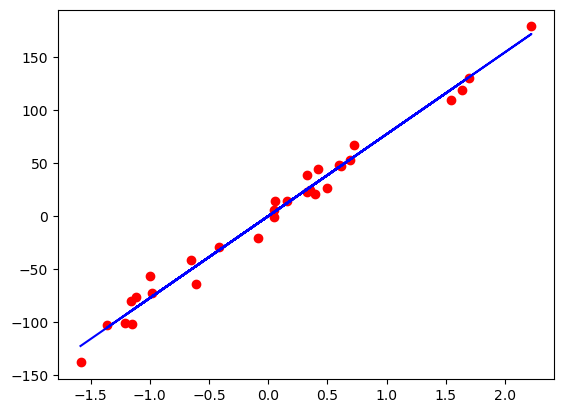

In [37]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=30, n_features=1, noise=10, random_state=4)
# here : f = 2 * x
# X_numpy = np.array([[1], [2], [3], [4]], dtype=np.float32)
# y_numpy = np.array([[2], [4], [8], [10]], dtype=np.float32)

# cast to float Tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

# 1) Model
# Linear model f = wx + b
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2) Loss and optimizer
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)

    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# Plot
predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

In [66]:
y_numpy

array([-137.74665797,  -72.66755925,  119.02139775, -101.78863272,
         67.0659878 ,  -28.51259957,  -56.57703276,   14.08765332,
        178.84600662,  -20.64694104,   44.91589194,   53.49645056,
        109.15424502,  -63.53385414,    5.9537804 ,  130.23478667,
        -80.21695606,   26.97563514,  -75.69042552,   21.25794392,
       -102.89184265,  -41.46052522,   48.53932661,   14.61926919,
       -100.53572416,   39.26885273,   47.37768384,   -0.5347795 ,
         22.95844507,   25.17572471])

In [29]:
predicted

array([[ 1.8690825],
       [ 4.6334753],
       [ 7.3978677],
       [10.16226  ]], dtype=float32)

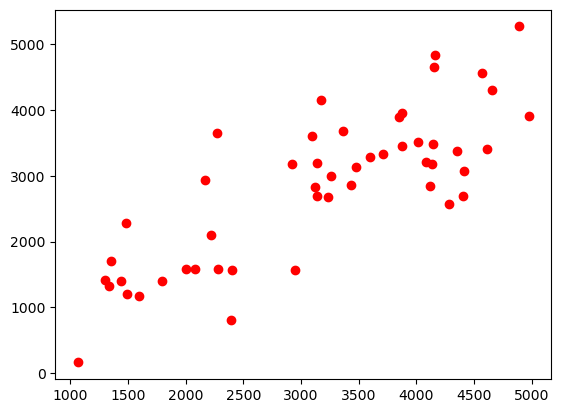

In [63]:
import numpy as np

# Veľkosť dátového setu
n = 50

# Generovanie náhodných dát pre výdavky na reklamu s rozsahom od 1000 do 5000 dolárov
výdavky_na_reklamu = np.random.randint(1000, 5001, size=n).reshape(-1, 1)

# Simulovanie počtu predaných produktov na základe výdavkov na reklamu s pridanou náhodnou chybou
# Budeme predpokladať, že existuje lineárna závislosť s koeficientom 0.6
# Pridáme tiež náhodnú chybu s normálnym rozdelením so štandardnou odchýlkou 1000
koeficient = 0.9
chyba = np.random.normal(0, 750, size=n)
predaje_produktu = koeficient * výdavky_na_reklamu.flatten() + chyba

plt.plot(výdavky_na_reklamu, predaje_produktu, 'ro')
# plt.plot(X_numpy, predicted, 'bo')
plt.show()

In [64]:
výdavky_na_reklamu

array([[4658],
       [2217],
       [4133],
       [3255],
       [4140],
       [2282],
       [2922],
       [4285],
       [1494],
       [3714],
       [1353],
       [4414],
       [4079],
       [4014],
       [2395],
       [3139],
       [3174],
       [4163],
       [3878],
       [1442],
       [3136],
       [2000],
       [3121],
       [1301],
       [3851],
       [1335],
       [1796],
       [2949],
       [3093],
       [4972],
       [2081],
       [4400],
       [3367],
       [4148],
       [3432],
       [4351],
       [2272],
       [3873],
       [4115],
       [3480],
       [4566],
       [2398],
       [3597],
       [1593],
       [2164],
       [1065],
       [1480],
       [4607],
       [4885],
       [3234]])

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider

# Veľkosť dátového setu
n = 50

# Generovanie náhodných dát pre výdavky na reklamu s rozsahom od 1000 do 5000 dolárov
výdavky_na_reklamu = np.random.randint(1000, 5001, size=n).reshape(-1, 1)

# Funkcia na simulovanie a zobrazenie dát s rôznymi hodnotami koeficientu a chyby
def simulácia(koeficient, max_chyba):
    # Simulovanie počtu predaných produktov na základe výdavkov na reklamu s pridanou náhodnou chybou
    chyba = np.random.normal(0, max_chyba, size=n)
    predaje_produktu = koeficient * výdavky_na_reklamu.flatten() + chyba

    # Vykreslenie dát
    plt.figure(figsize=(8, 6))
    plt.plot(výdavky_na_reklamu, predaje_produktu, 'ro')
    plt.xlabel('Výdavky na reklamu (v dolároch)')
    plt.ylabel('Počet predaných produktov')
    plt.title('Vzťah medzi výdavkami na reklamu a počtom predaných produktov')
    plt.grid(True)
    plt.show()

# Vytvorenie posuvníkov
interact(simulácia, koeficient=FloatSlider(min=0.1, max=2.0, step=0.1, value=0.9), max_chyba=IntSlider(min=100, max=1000, step=50, value=500))


interactive(children=(FloatSlider(value=0.9, description='koeficient', max=2.0, min=0.1), IntSlider(value=500,…

<function __main__.simulácia(koeficient, max_chyba)>

In [35]:
predaje_produktu

array([ 2883.3352959 ,  2961.53729817,  1775.46423082,  2781.87733327,
         609.65141543,  1178.03793458,  2845.51738973,  1613.11176131,
         832.31492331,  1823.10825338,  1373.88392009,  1731.65778436,
        3062.9459989 ,  3645.16103907,  4081.89849607,  2825.73570354,
        1284.31762956, -1165.75494195,  -141.42644921,   833.33498836,
        2530.70925031,  3463.1857125 ,   512.76959647,  3852.59904438,
        1578.23924878,   184.57855219,  2143.36137229,  1755.39843077,
        2054.39996113,    87.57010543,  1274.20761502,  2567.75463946,
         692.04139981,  1942.52988734,  1471.2893879 ,  3003.69660068,
        2703.1505001 ,  1622.45960126,   919.24891641,  3194.73456782,
        3097.62571307,  3156.25928976,   669.65000181,  1604.77965743,
         937.78213077,   462.5681224 ,  3270.48039787,  3291.81285265,
        1710.27354953,  1078.15671021])

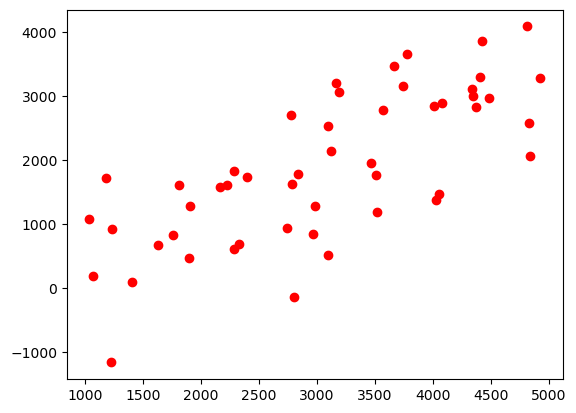

In [38]:

plt.plot(výdavky_na_reklamu, predaje_produktu, 'ro')
# plt.plot(X_numpy, predicted, 'bo')
plt.show()

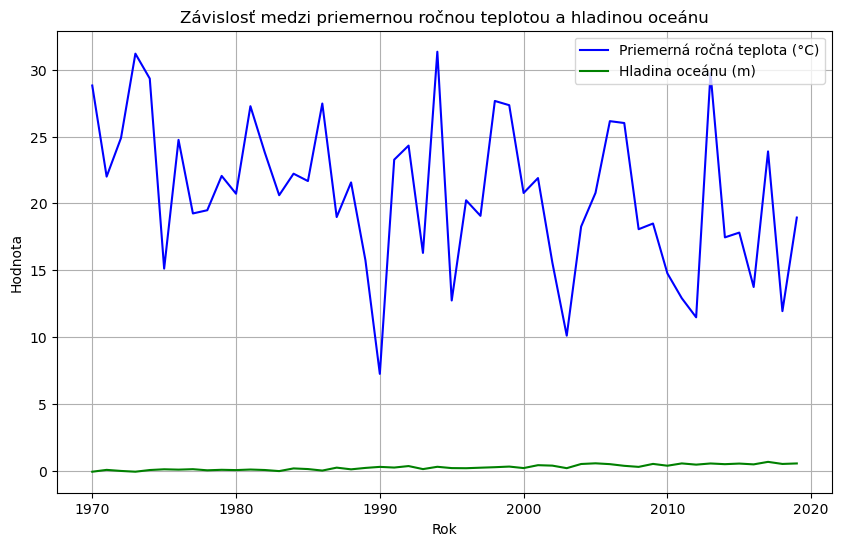

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Generovanie fiktívnych dát pre priemernú ročnú teplotu a hladinu oceánu
np.random.seed(0)  # Nastavíme seed pre reprodukovateľnosť výsledkov

# Počet rokov dát
n_years = 50

# Generovanie rokov
years = np.arange(1970, 1970 + n_years)

# Simulácia priemernej ročnej teploty v stupňoch Celzia
average_temperature = np.random.normal(20, 5, size=n_years)

# Simulácia hladiny oceánu v metroch
ocean_levels = np.random.normal(0, 0.1, size=n_years) + 0.01 * (years - 1970)

# Vykreslenie závislosti
plt.figure(figsize=(10, 6))
plt.plot(years, average_temperature, label='Priemerná ročná teplota (°C)', color='blue')
plt.plot(years, ocean_levels, label='Hladina oceánu (m)', color='green')
plt.xlabel('Rok')
plt.ylabel('Hodnota')
plt.title('Závislosť medzi priemernou ročnou teplotou a hladinou oceánu')
plt.legend()
plt.grid(True)
plt.show()
